# Exploring the Data Distribution

Data set containing population and murder rates (in units of murders per 100,000 people per year) for each US state (2010 Census).

In [234]:
import pandas as pd

In [235]:
# load the data
state = pd.read_csv('data/state.csv')

In [236]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [237]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


## 1. Percentiles and Boxplots

#### (a) pandas dataframe method quantile used to calc percentile.

In [238]:
# estimate some percentiles of murder rate by state
sr = round(state['Murder.Rate'].quantile([0.05,0.25,0.50,0.75,0.95]),2)
sr

0.05    1.60
0.25    2.42
0.50    4.00
0.75    5.55
0.95    6.51
Name: Murder.Rate, dtype: float64

In [239]:
type(sr)

pandas.core.series.Series

In [240]:
# reformat the index
sr.index = sr.index.map(lambda x: str(int(x*100)) + '%')
sr

5%     1.60
25%    2.42
50%    4.00
75%    5.55
95%    6.51
Name: Murder.Rate, dtype: float64

###### convert series to df (Method-1)

In [241]:
# convert series to dataframe
df1 = pd.DataFrame(data=sr.index,columns=['Percentile'])
df2 = pd.DataFrame(data=sr.values,columns=['Murder.Rate'])
df = pd.merge(df1,df2,left_index=True,right_index=True)
df

,Percentile,Murder.Rate
0,5%,1.60
1,25%,2.42
2,50%,4.00
3,75%,5.55
4,95%,6.51


In [242]:
# delete df
del df

##### convert series to df (Method-2)

In [243]:
# convert series to dataframe
df = pd.DataFrame({'Percentile':sr.index,'Murder.Rate':sr.values})
df

,Percentile,Murder.Rate
0,5%,1.60
1,25%,2.42
2,50%,4.00
3,75%,5.55
4,95%,6.51


In [244]:
del df

##### convert series to df (Method-3)

In [245]:
# get the name of index of series
print(sr.index.name)

None


In [246]:
# convert the series to df
df = sr.rename_axis('Percentile').reset_index('Percentile')
df

,Percentile,Murder.Rate
0,5%,1.60
1,25%,2.42
2,50%,4.00
3,75%,5.55
4,95%,6.51


In [247]:
del df

##### convert series to df (Method-4)

In [248]:
# convert the df to series
df = sr.rename_axis('Percentile').to_frame()
df

,Murder.Rate
Percentile,
5%,1.60
25%,2.42
50%,4.00
75%,5.55
95%,6.51


#### transpose the df

In [249]:
df.transpose()

Percentile,5%,25%,50%,75%,95%
Murder.Rate,1.6,2.42,4.0,5.55,6.51


The median is 4 murders per 100,000 people, athough there is bit of variablity: 5th percentile is only 1.6 whereas 95th percentile is 6.51

#### (b) pandas provides a no. of basic exploratory plots for df.

Text(0, 0.5, 'Population (millions)')

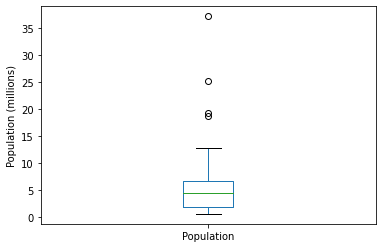

In [250]:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

From this we can see that the median state population is about 5 million.<br>
1/2 of the states falls in 2 to 7 million populations.<br>
and there are some high popultaion outliers.<br>

The top and bottom are 25th and 75th percentile.<br>
Median is the horizonatal line between the box.<br>
dashed lines refred as whisker, extended from the top and bottom of the box to indicate the rnge of the data.<br>
Any data outside of whisker is plotted as single point or circles(often considered outliers). 

## 2. Frequency Tables and Histograms

#### (a) pandas.cut creats a series that maps the values into the segments. Using method value_counts, we get the freq table

In [257]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [263]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.head()

0      (4232659.0, 7901692.0]
1      (526935.67, 4232659.0]
2      (4232659.0, 7901692.0]
3      (526935.67, 4232659.0]
4    (33584923.0, 37253956.0]
Name: Population, dtype: category
Categories (10, interval[float64]): [(526935.67, 4232659.0] < (4232659.0, 7901692.0] < (7901692.0, 11570725.0] < (11570725.0, 15239758.0] ... (22577824.0, 26246857.0] < (26246857.0, 29915890.0] < (29915890.0, 33584923.0] < (33584923.0, 37253956.0]]

In [264]:
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [265]:
binnedPopulation.name = 'binnedPopulation'
binnedPopulation.head()

0      (4232659.0, 7901692.0]
1      (526935.67, 4232659.0]
2      (4232659.0, 7901692.0]
3      (526935.67, 4232659.0]
4    (33584923.0, 37253956.0]
Name: binnedPopulation, dtype: category
Categories (10, interval[float64]): [(526935.67, 4232659.0] < (4232659.0, 7901692.0] < (7901692.0, 11570725.0] < (11570725.0, 15239758.0] ... (22577824.0, 26246857.0] < (26246857.0, 29915890.0] < (29915890.0, 33584923.0] < (33584923.0, 37253956.0]]

In [266]:
freq_tbl = pd.concat([state,binnedPopulation],axis=1)
freq_tbl.head()

,State,Population,Murder.Rate,Abbreviation,binnedPopulation
0,Alabama,4779736,5.7,AL,"(4232659.0, 7901692.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
2,Arizona,6392017,4.7,AZ,"(4232659.0, 7901692.0]"
3,Arkansas,2915918,5.6,AR,"(526935.67, 4232659.0]"
4,California,37253956,4.4,CA,"(33584923.0, 37253956.0]"


In [268]:
freq_tbl = freq_tbl.sort_values(by='binnedPopulation')
freq_tbl.head()

,State,Population,Murder.Rate,Abbreviation,binnedPopulation
49,Wyoming,563626,2.7,WY,"(526935.67, 4232659.0]"
27,Nevada,2700551,6.0,NV,"(526935.67, 4232659.0]"
23,Mississippi,2967297,8.6,MS,"(526935.67, 4232659.0]"
28,New Hampshire,1316470,0.9,NH,"(526935.67, 4232659.0]"
30,New Mexico,2059179,4.8,NM,"(526935.67, 4232659.0]"


In [269]:
st_groups = []
for group , subset in freq_tbl.groupby('binnedPopulation'):
    st_groups.append({
        'BinRange': group,
        'Count' :len(subset),
        'States': ', '.join(subset['Abbreviation'])
    })

In [270]:
st_groups[:3]

[{'BinRange': Interval(526935.67, 4232659.0, closed='right'),
  'Count': 24,
  'States': 'WY, NV, MS, NH, NM, ND, OK, ME, OR, RI, KS, IA, MT, NE, ID, HI, UT, DE, CT, VT, AR, WV, AK, SD'},
 {'BinRange': Interval(4232659.0, 7901692.0, closed='right'),
  'Count': 14,
  'States': 'TN, WA, SC, AL, MN, AZ, CO, IN, WI, LA, MD, KY, MA, MO'},
 {'BinRange': Interval(7901692.0, 11570725.0, closed='right'),
  'Count': 6,
  'States': 'NC, GA, MI, VA, NJ, OH'}]

In [271]:
pd.options.display.max_colwidth = 5000
freq_tbl_df = pd.DataFrame(st_groups)
freq_tbl_df

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY, NV, MS, NH, NM, ND, OK, ME, OR, RI, KS, IA, MT, NE, ID, HI, UT, DE, CT, VT, AR, WV, AK, SD"
1,"(4232659.0, 7901692.0]",14,"TN, WA, SC, AL, MN, AZ, CO, IN, WI, LA, MD, KY, MA, MO"
2,"(7901692.0, 11570725.0]",6,"NC, GA, MI, VA, NJ, OH"
3,"(11570725.0, 15239758.0]",2,"PA, IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


#### (b) pandas support histogram for df with DataFrame.plot.hist method

Text(0.5, 0, 'Population (million)')

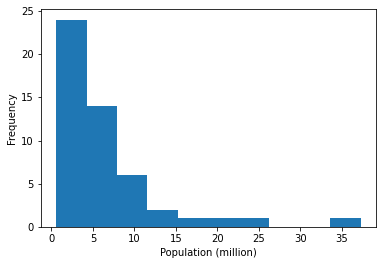

In [272]:
ax = (state['Population']/1000000).plot.hist()
ax.set_xlabel('Population (million)')

## 3. Density Plots and Estimates

#### (a) pandas provide the density method to create a density plot. Use the argument bw_method to control the smoothness of the density curve.

<AxesSubplot:xlabel='Murder Rate per 100,000', ylabel='Density'>

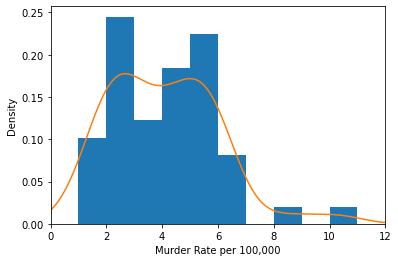

In [273]:
ax = state['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
ax.set_xlabel('Murder Rate per 100,000')
state['Murder.Rate'].plot.density(ax=ax)

---
---
**Key Ideas**

* A frequency histogram plots frequency counts on the y -axis and variable values on x-axis
* A frequency table is a tabular version of the frequency counts found in a histogram.
* A boxplot - with the top and bottom of the box at the 75th and 25th percentiles, respectively-also gives a quick sense of the distribution of the data;it is often used in side by side display to compare distributions.
* A density plot is a smoothed version of histogram; it requires a function to estimate a plot based on the data.
---
---